In [1]:
import pandas as pd
import yfinance as yf
import vectorbt as vbt

### Cruzamento de médias móveis

Vamos testar a estratégia de cruzamento de médias móveis utilizando o Vectorbt como ferramenta de backtest.

As médias móveis são definidas pela quantidade de períodos incluídos no cálculo. Normalmente usa-se uma quantidade de períodos menor em conjunto com outra de maior quantidade de períodos.

Quando a média curta passa para cima da média longa pode significar uma tendência de alta e de baixa quando o contrário ocorre.

As médias móveis são usadas há anos pela estatística para suavizar valores em séries temporais, filtrando ruído provocado por flutuações de curto prazo e destacando tendências ou ciclos de longo prazo.

Fonte: https://smarttbot.com/trader/medias-moveis-para-day-trade/

In [2]:
# Histórico do Índice Ibovespa
dados = vbt.YFData.download('^BVSP').get()

In [3]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-27 00:00:00+00:00,24.799999,25.400000,24.500000,24.500000,0,0,0
1993-04-28 00:00:00+00:00,24.500000,24.600000,23.700001,24.299999,0,0,0
1993-04-29 00:00:00+00:00,24.299999,24.799999,23.700001,23.700001,0,0,0
1993-04-30 00:00:00+00:00,23.700001,24.200001,23.700001,24.100000,0,0,0
1993-05-03 00:00:00+00:00,24.100000,24.400000,23.799999,24.100000,0,0,0


In [4]:
fechamento = dados['2012':]['Close'].copy()

Calculando as médias móveis

In [5]:
media_curta = vbt.MA.run(fechamento, 10) # 15 dias (média rápida)
media_longa = vbt.MA.run(fechamento, 60) # 60 dias (média lenta)

***

### Estratégia

* **COMPRAR** (= +1) média curta passa para cima da média longa.
* **VENDER** (= -1) a média curta voltar para baixo da média longa.

In [6]:
compras = media_curta.ma_crossed_above(media_longa)
vendas = media_curta.ma_crossed_below(media_longa)

Execução do backtest considerando os sinais de compra e venda calculados anteriormente

In [7]:
pf = vbt.Portfolio.from_signals(fechamento, compras, vendas, freq='d', init_cash=1000)

In [8]:
pf.total_return()

1.2101691783017463

Gráfico das ordens: compras (buy) e vendas (sell)

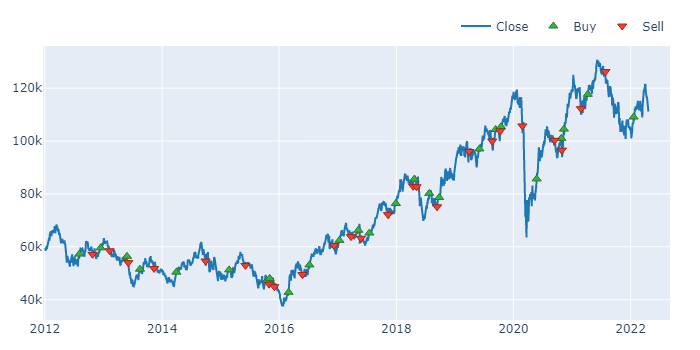

In [9]:
pf.plot_orders().show_png()

### Comparando a estratégia com a oopção Long Only

In [10]:
import pandas as pd

In [11]:
retornos_long_only = fechamento.pct_change() 

In [12]:
estrategias = pd.concat([pf.returns(), retornos_long_only], axis=1)
estrategias.columns = ['Cruzamento MM', 'Long Only']

In [13]:
estrategias.tail()

,Cruzamento MM,Long Only
Date,,
2022-04-14 00:00:00+00:00,-0.005138,-0.005138
2022-04-18 00:00:00+00:00,-0.004261,-0.004261
2022-04-19 00:00:00+00:00,-0.005446,-0.005446
2022-04-20 00:00:00+00:00,-0.006197,-0.006197
2022-04-22 00:00:00+00:00,-0.027837,-0.027837


In [14]:
retornos = (estrategias + 1).cumprod()-1 # obtendo o retorno acumulado

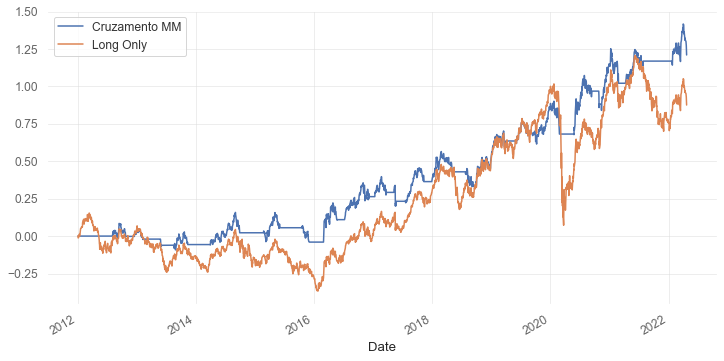

In [15]:
retornos.plot(figsize=(12,6));

In [16]:
# Retorno final de cada estratégia
retornos.tail(1)

,Cruzamento MM,Long Only
Date,,
2022-04-22 00:00:00+00:00,1.210169,0.87566


### Quais os sinais dos últimos 5 dias?

In [17]:
sinais = pd.concat([compras, vendas], axis=1)
sinais.columns = ['Compra', 'Venda']

In [18]:
sinais.tail(5)

,Compra,Venda
Date,,
2022-04-14 00:00:00+00:00,False,False
2022-04-18 00:00:00+00:00,False,False
2022-04-19 00:00:00+00:00,False,False
2022-04-20 00:00:00+00:00,False,False
2022-04-22 00:00:00+00:00,False,False
